# --------------PREDICTIVE ANALYSIS USING MACHINE LEARNING--------------------

### Importing necessary libraries 

In [1107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [920]:
df = pd.read_csv('data.csv')

In [921]:
pd.set_option("display.max_columns", None)

In [922]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Checking dataset information

In [924]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Checking the null values in dataset

In [926]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Filling null values with median value in Number of Doors

In [928]:
df['Number of Doors'].median()

4.0

In [929]:
df['Number of Doors'].fillna(4.0, inplace = True)

In [930]:
df['Number of Doors'].isna().sum()

0

### Checking for unique values with their frequency

In [931]:
df['Engine Fuel Type'].value_counts()

Engine Fuel Type
regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: count, dtype: int64

### Filling null values with maximum frequency value in Engine fuel type

In [932]:
df['Engine Fuel Type'].fillna('regular unleaded', inplace = True)

In [933]:
df['Engine Fuel Type'].isna().sum()

0

### Filling null values with median value in Engine HP column

In [934]:
df['Engine HP'].fillna(df['Engine HP'].median(), inplace = True)

### Filling null values with median value in Engine Cylinders column

In [935]:
df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace = True)

### Rechecking for Null Values

In [936]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Dropping Market Category Column

In [937]:
df.drop(['Market Category'], inplace = True, axis = 1)

### Checking for Null Values

In [938]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Cheking the shape of the dataset

In [1083]:
df.shape

(11913, 1002)

### Number of Cars in Different Years

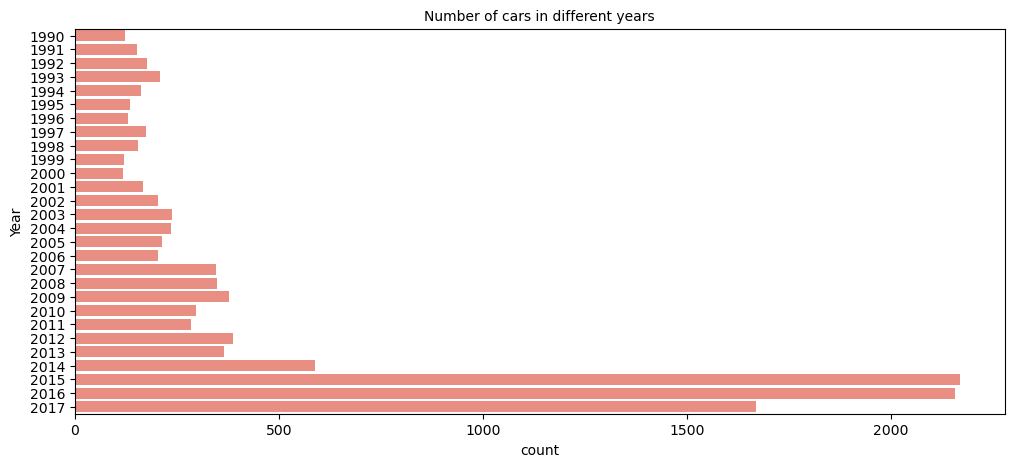

In [940]:
plt.figure(figsize = (12, 5))
sns.countplot(y = 'Year', data = df, color = 'Salmon')
plt.title("Number of cars in different years", fontsize = 10)
plt.show()

### Number of Cars with their Car Companies

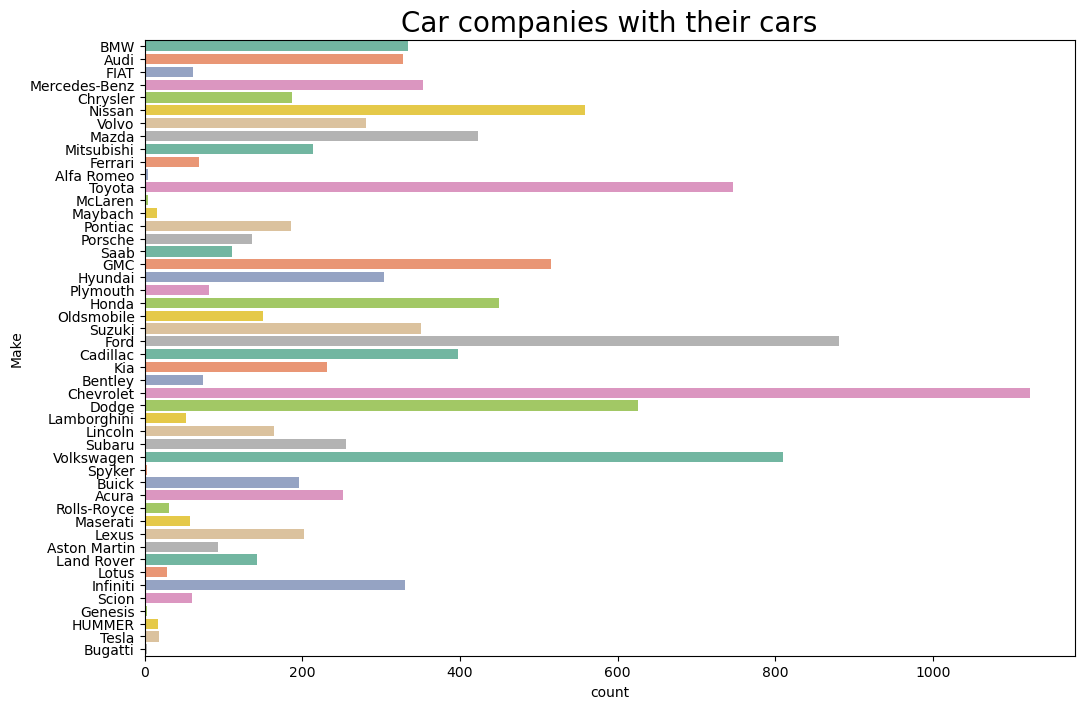

In [941]:
plt.figure(figsize = (12, 8))
sns.countplot(y = 'Make', data = df, palette = 'Set2')
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

### Number of Cars with different Transmission Types

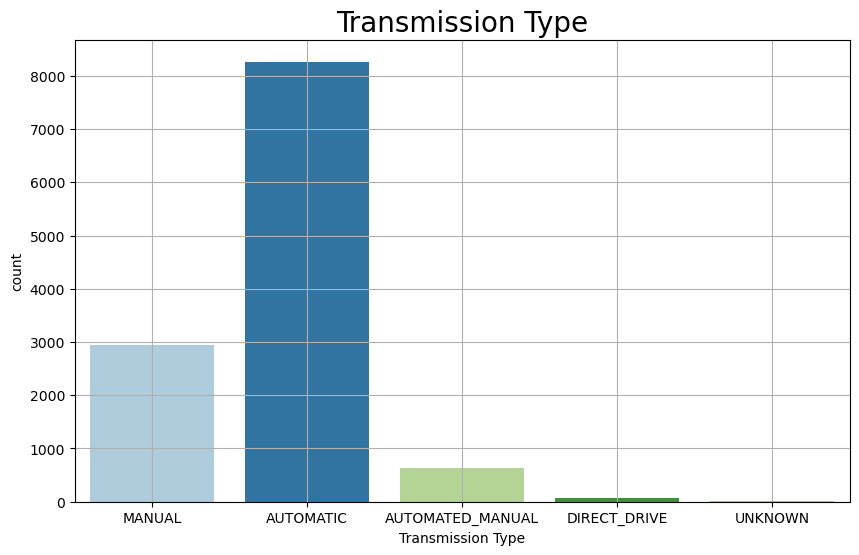

In [942]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Transmission Type', data = df, palette = 'Paired')
plt.title("Transmission Type", fontsize = 20)
plt.grid(True)
plt.show()

### Number of Cars with different vehicle sizes

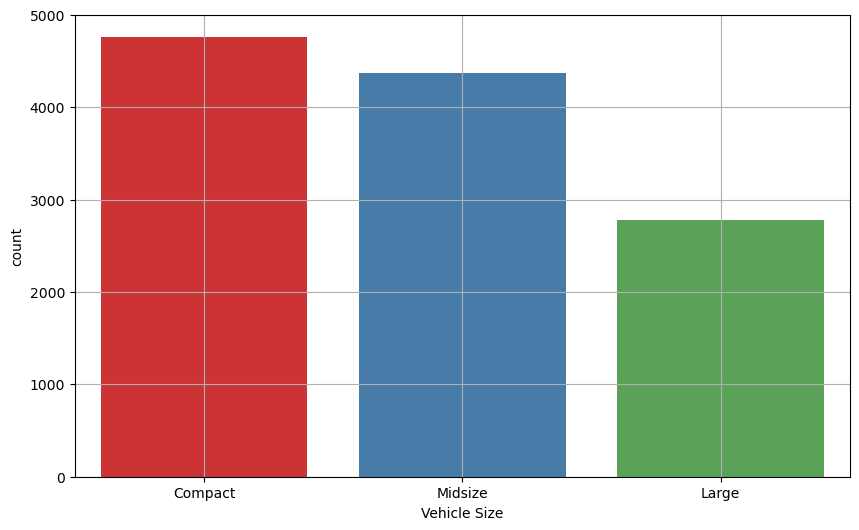

In [943]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Vehicle Size', data = df, palette = 'Set1')
plt.grid(True)
plt.show()

### Car Models with information of Engine HP, Engine Cylinders, Highway MPG & City MPG on the basis of min, max & mean values

In [944]:
df.groupby('Make')[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']].agg(['min', 'max', 'mean'])

Engine HP                      Engine Cylinders        \
                    min     max         mean              min   max   
Make                                                                  
Acura             111.0   573.0   244.797619              4.0   6.0   
Alfa Romeo        237.0   237.0   237.000000              4.0   4.0   
Aston Martin      420.0   568.0   484.322581              8.0  12.0   
Audi              108.0   610.0   277.695122              4.0  12.0   
BMW               170.0   600.0   326.907186              0.0  12.0   
Bentley           400.0   631.0   533.851351              8.0  12.0   
Bugatti          1001.0  1001.0  1001.000000             16.0  16.0   
Buick             138.0   310.0   219.244898              4.0   8.0   
Cadillac          140.0   640.0   332.309824              4.0   8.0   
Chevrolet          55.0   650.0   246.865539              0.0   8.0   
Chrysler          100.0   385.0   229.139037              4.0   8.0   
Dodge              92.0   707.0   244.415335              4.0  10.0   
FIAT              101.0   227.0   147.596774              0.0   4.0   
Ferrari           400.0   731.0   511.956522              8.0  12.0   
Ford               63.0   662.0   242.860386              0.0   8.0   
GMC               105.0   420.0   259.844660              4.0   8.0   
Genesis           311.0   420.0   347.333333              6.0   8.0   
HUMMER            239.0   300.0   261.235294              5.0   8.0   
Honda              62.0   280.0   195.888641              0.0   6.0   
Hyundai            81.0   429.0   201.917492              4.0   8.0   
Infiniti          145.0   420.0   310.066667              4.0   8.0   
Kia               125.0   420.0   207.264069              0.0   8.0   
Lamborghini       550.0   750.0   614.076923             10.0  12.0   
Land Rover        174.0   550.0   322.097902              4.0   8.0   
Lexus             134.0   552.0   277.415842              4.0  10.0   
Lincoln           188.0   380.0   282.085366              4.0   8.0   
Lotus             189.0   400.0   275.965517              4.0   8.0   
Maserati          345.0   523.0   420.793103              6.0   8.0   
Maybach           543.0   631.0   590.500000             12.0  12.0   
Mazda              82.0   274.0   171.992908              4.0   6.0   
McLaren           562.0   641.0   610.400000              8.0   8.0   
Mercedes-Benz     121.0   641.0   349.832861              0.0  12.0   
Mitsubishi         66.0   320.0   173.680751              3.0   8.0   
Nissan             90.0   600.0   239.689964              0.0   8.0   
Oldsmobile        110.0   275.0   177.466667              4.0   8.0   
Plymouth           92.0   253.0   131.560976              4.0   6.0   
Pontiac            74.0   415.0   190.295699              4.0   8.0   
Porsche           208.0   605.0   392.794118              4.0  10.0   
Rolls-Royce       322.0   624.0   487.548387              8.0  12.0   
Saab              150.0   390.0   220.522523              4.0   8.0   
Scion              94.0   200.0   154.433333              4.0   4.0   
Spyker            400.0   400.0   400.000000              8.0   8.0   
Subaru             66.0   305.0   197.308594              3.0   6.0   
Suzuki             66.0   261.0   160.287749              4.0   6.0   
Tesla             227.0   227.0   227.000000              0.0   0.0   
Toyota             93.0   381.0   236.123324              0.0   8.0   
Volkswagen         81.0   444.0   189.757726              4.0  12.0   
Volvo             114.0   345.0   230.971530              4.0   6.0   

                         highway MPG                 city mpg                  
                    mean         min  max       mean      min  max       mean  
Make                                                                           
Acura           5.333333          17   38  28.111111       13   39  19.940476  
Alfa Romeo      4.000000          34   34  34.000000       24   24  24.0

### Average increase in prices from 1990 to 2017

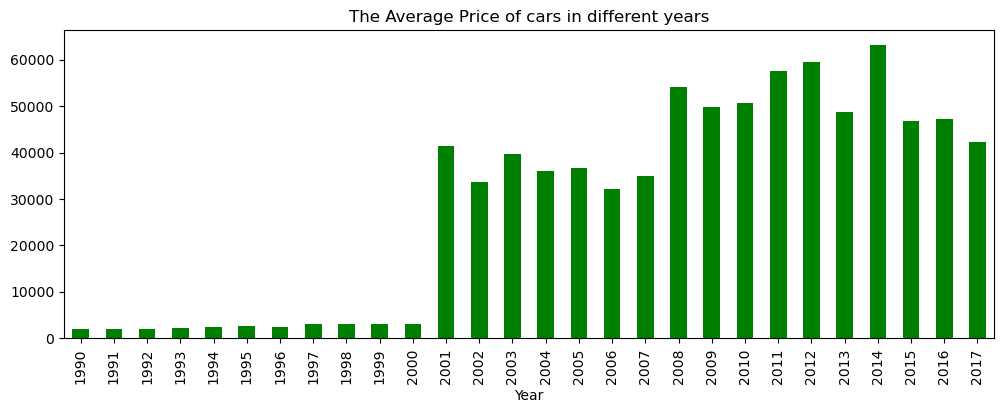

In [945]:
plt.figure(figsize = (12, 4))
df.groupby('Year')['MSRP'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 12)
plt.show()

### The Average Price of cars in different tranmission types

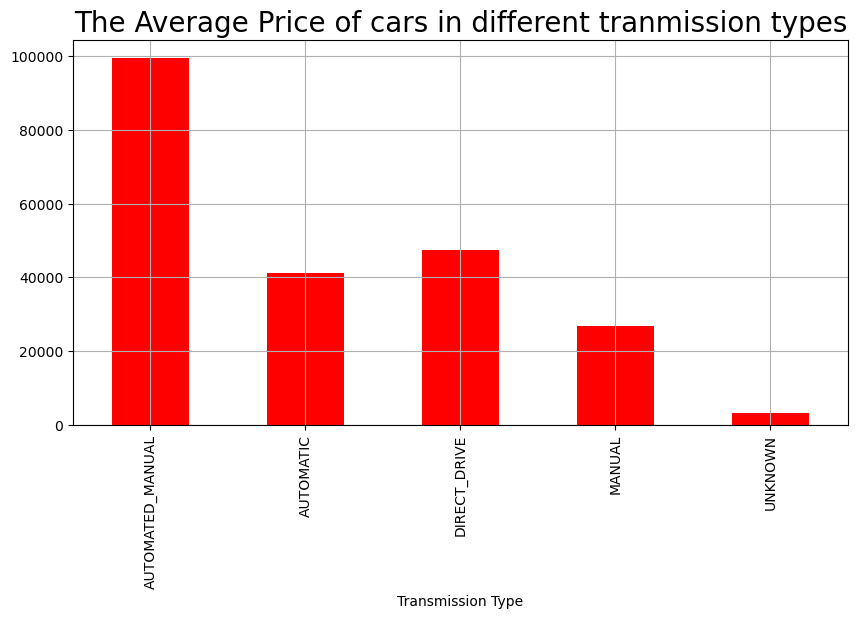

In [946]:
plt.figure(figsize = (10, 5))
df.groupby('Transmission Type')['MSRP'].mean().plot(kind = 'bar', color = 'r')
plt.title("The Average Price of cars in different tranmission types", fontsize = 20)
plt.grid(True)
plt.show()

### The average price of cars of different companies

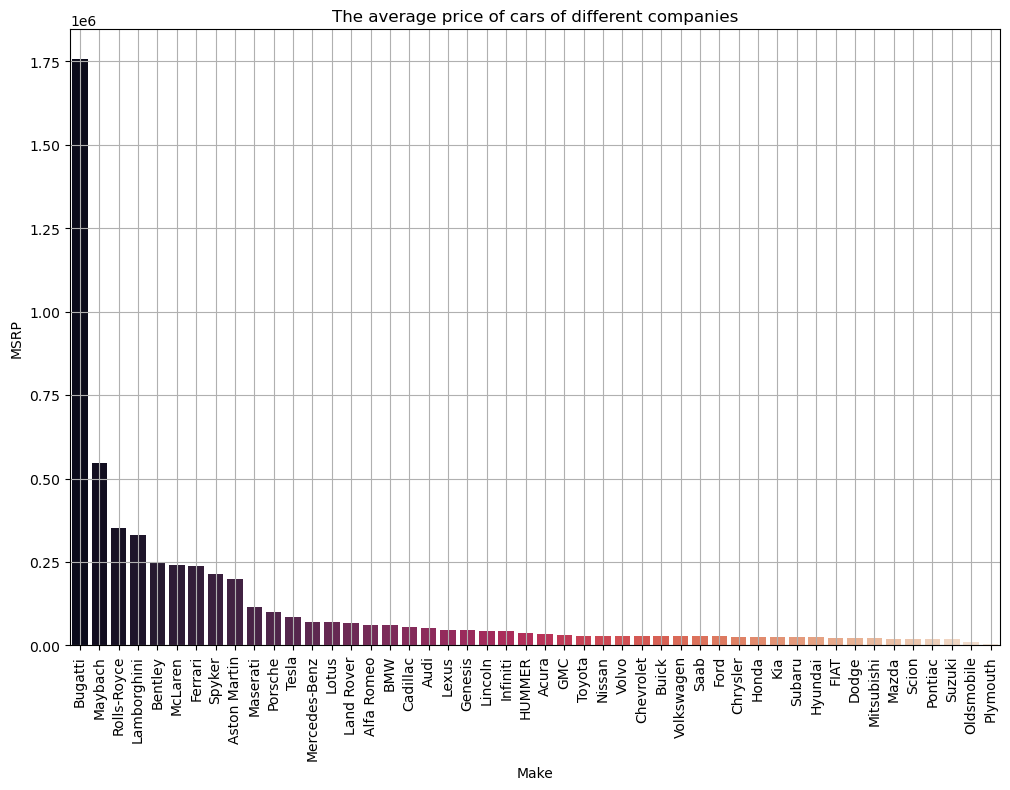

In [947]:
plt.figure(figsize=(12, 8))
avg_price = df.groupby('Make')['MSRP'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=avg_price, x='Make', y='MSRP', palette='rocket')
plt.title("The average price of cars of different companies", fontsize=12)
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

### Engine HP vs Car Make

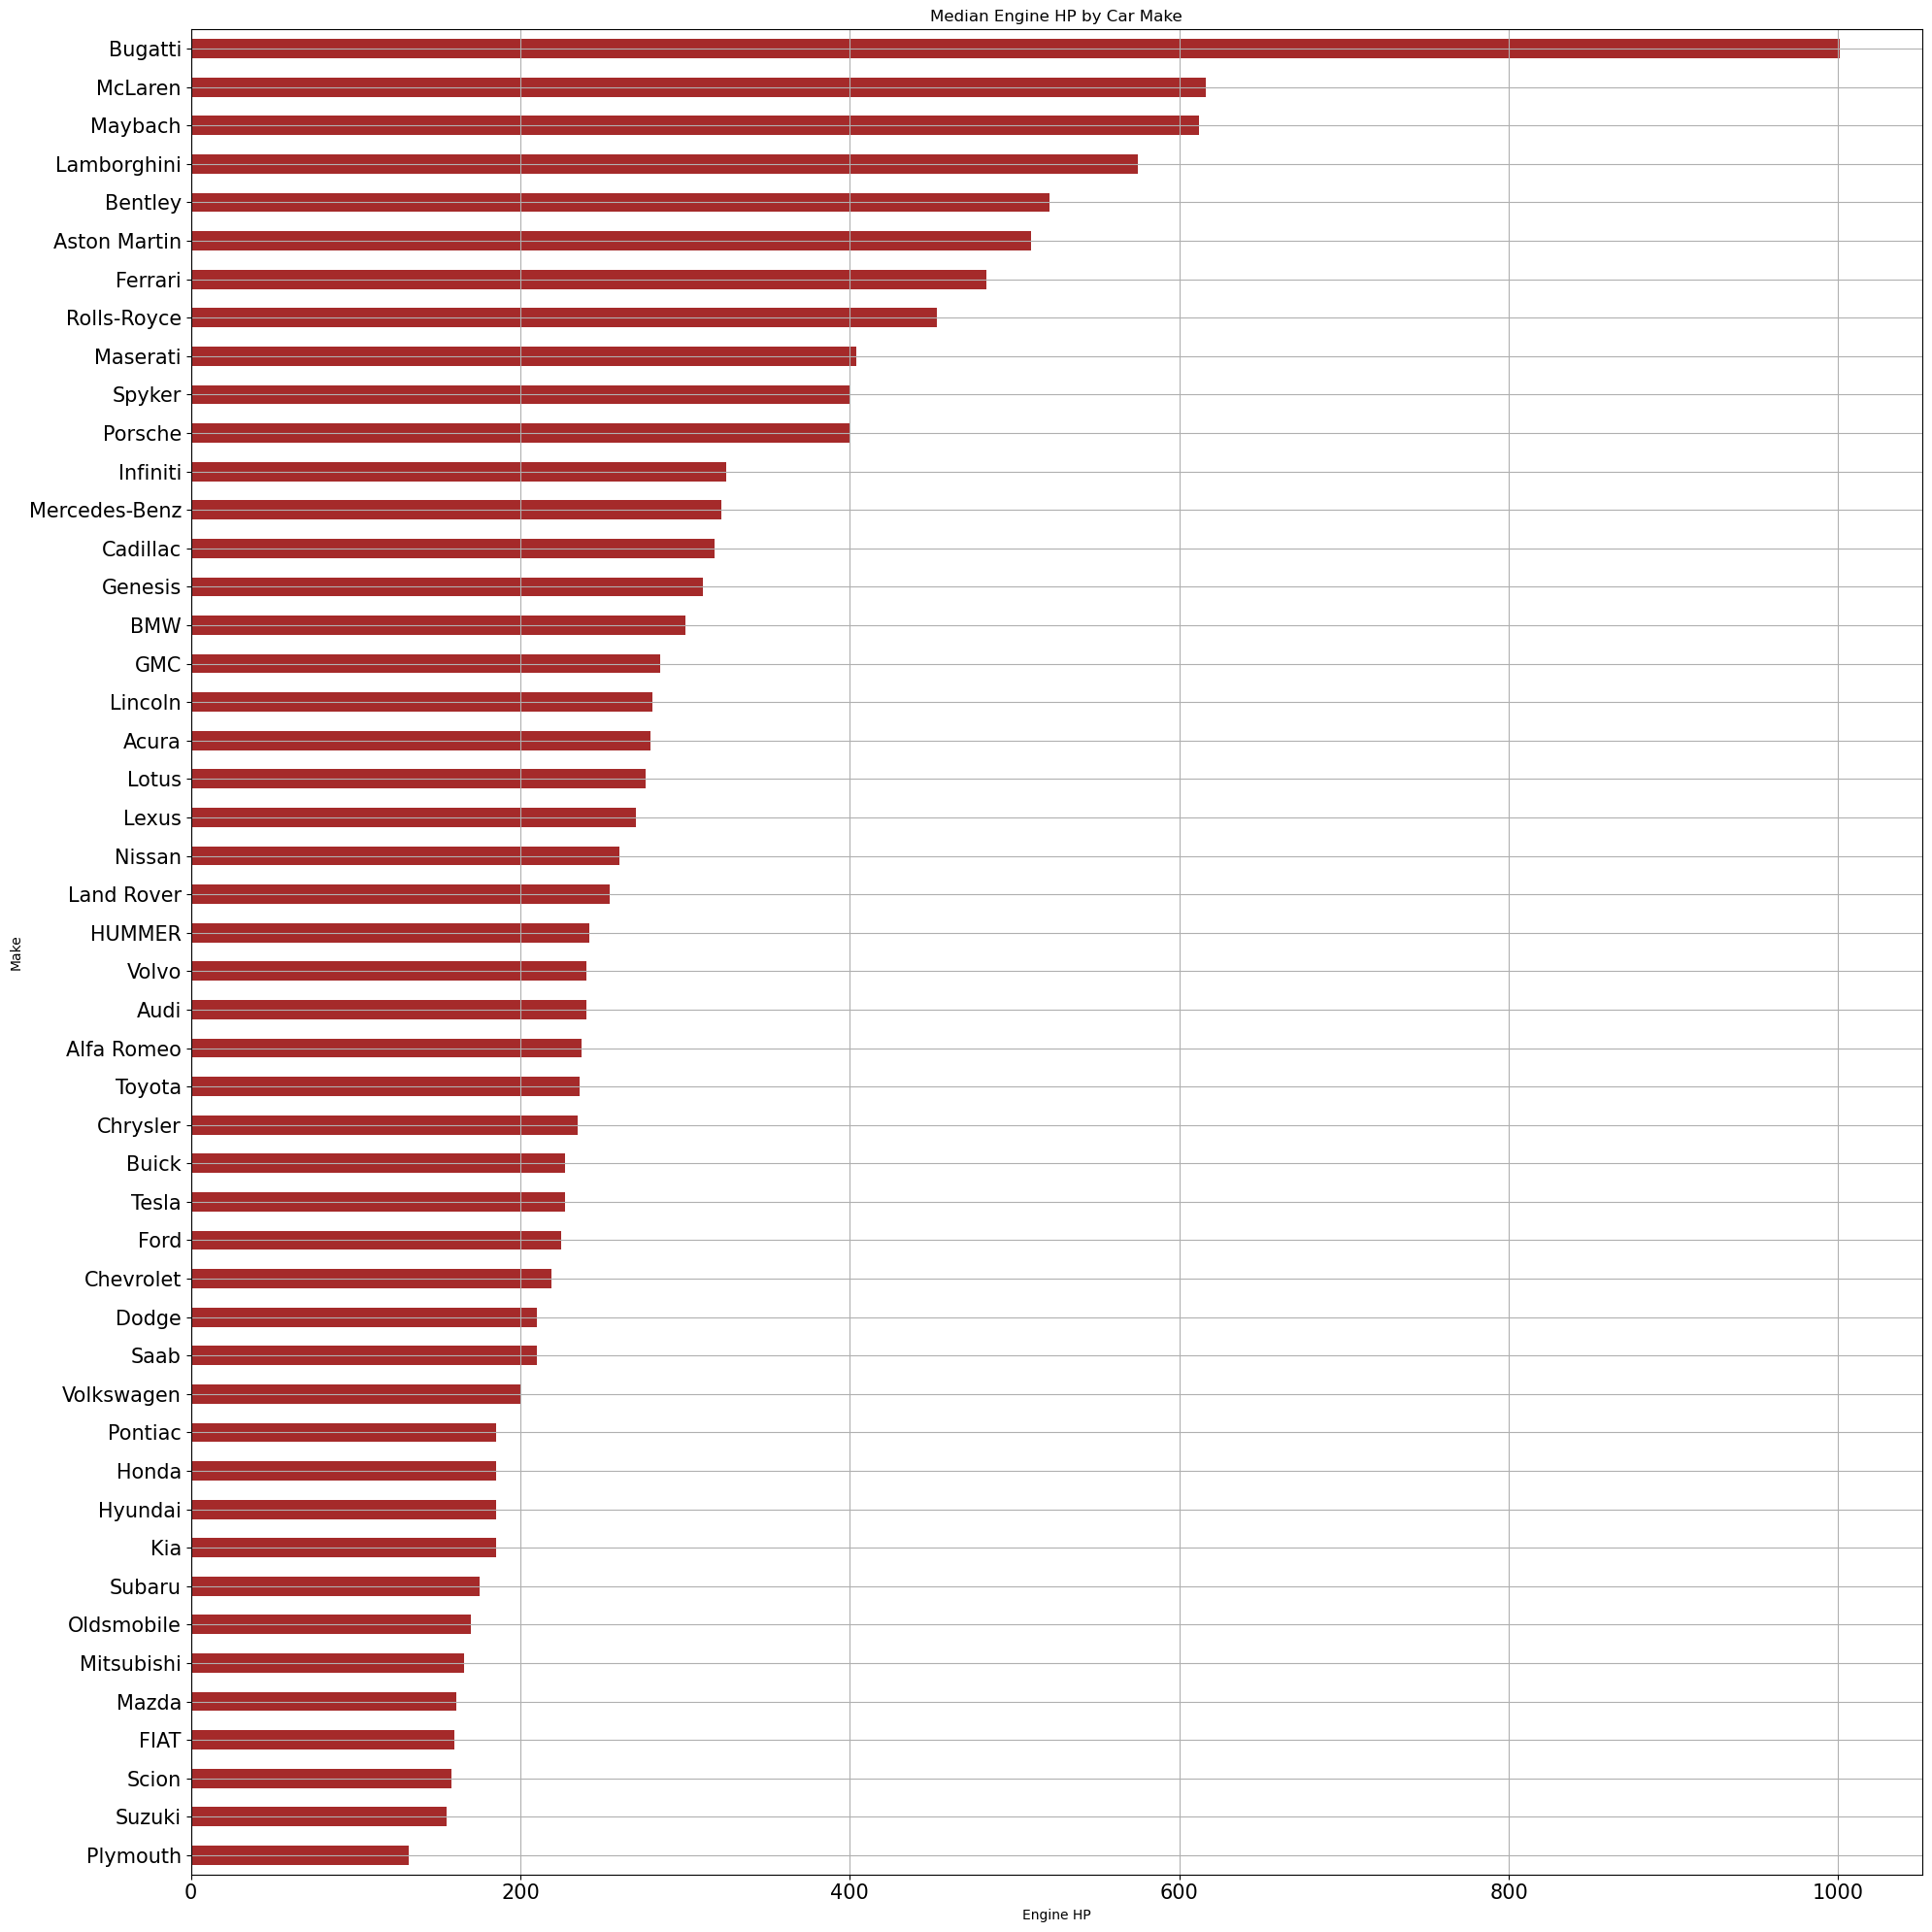

In [948]:
plt.figure(figsize=(12, 8))
df.groupby('Make')['Engine HP'].median().sort_values().plot(
    kind='barh',
    figsize=(20, 20),
    fontsize=15,
    color='brown',
    title='Median Engine HP by Car Make'
)
plt.xlabel("Engine HP")
plt.grid(True)
plt.tight_layout()
plt.show()

### The average cost of cars based on the driven wheels

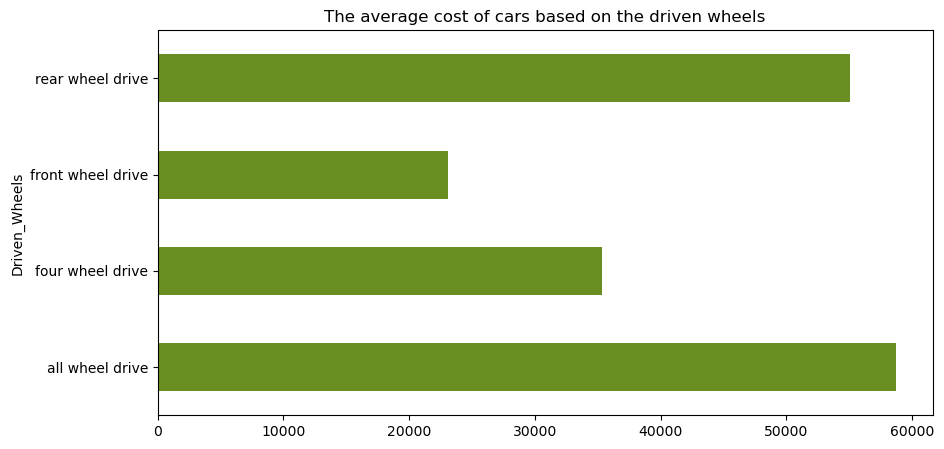

In [949]:
plt.figure(figsize = (10, 5))
df.groupby('Driven_Wheels')['MSRP'].mean().plot(kind = 'barh', color = 'olivedrab')
plt.title("The average cost of cars based on the driven wheels", fontsize= 12)
plt.show()

### Popularity of various car brands

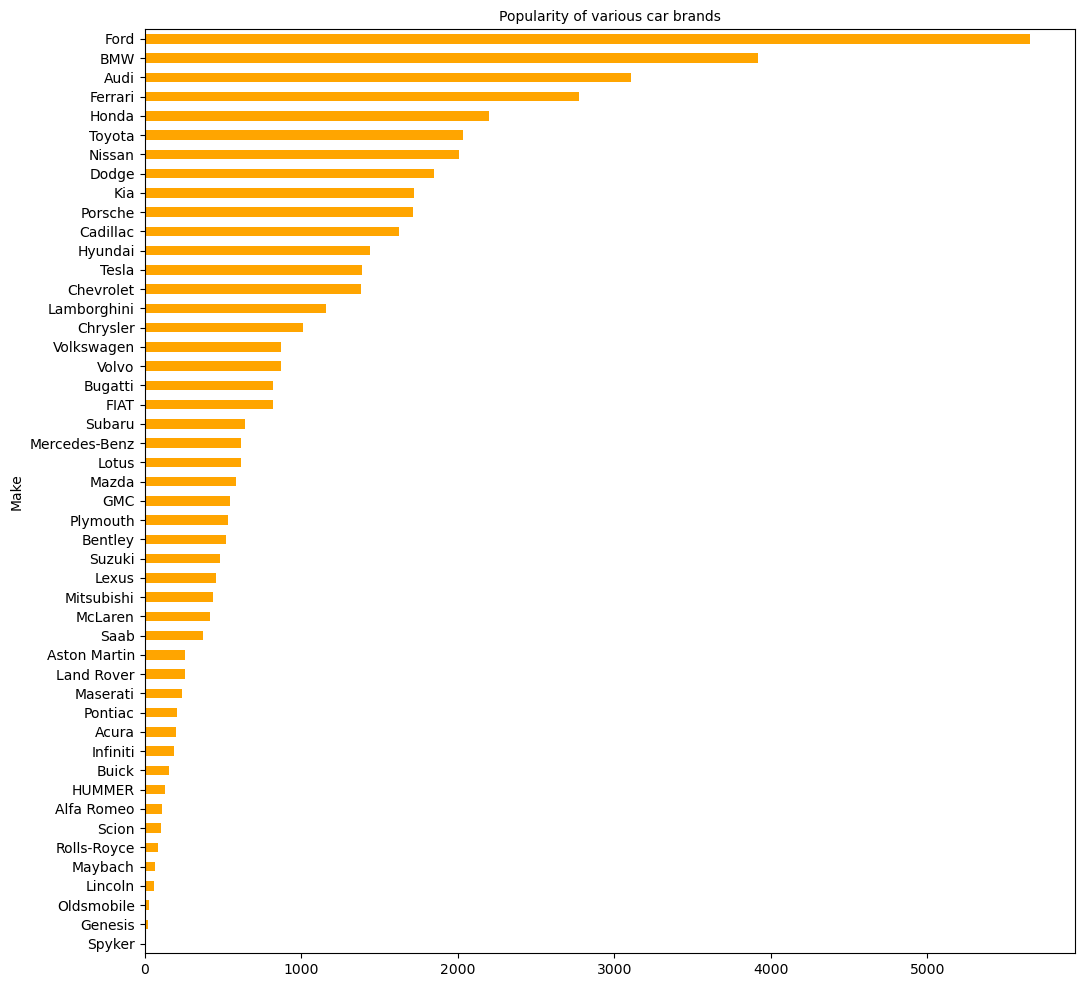

In [950]:
plt.figure(figsize = (12, 12))
df.groupby('Make')['Popularity'].mean().sort_values(ascending = True).plot(kind = 'barh', color = 'orange')
plt.yticks(fontsize = 10)
plt.title("Popularity of various car brands", fontsize = 10)
plt.show()

### Scatterplot between highway MPG and city mpg

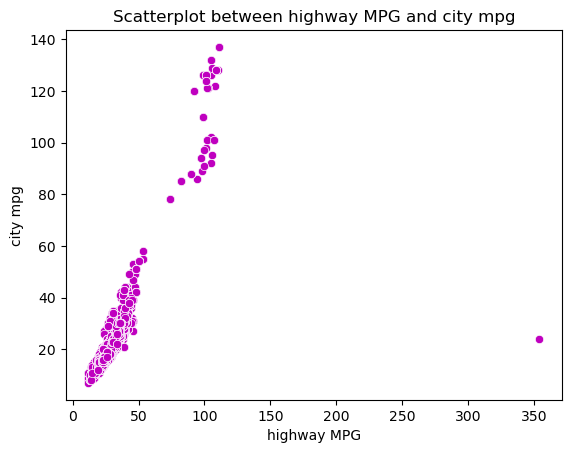

In [951]:
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = df, color = 'm')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

### Removing the single outlier greater than 150 highway mpg

In [952]:
df[df['highway MPG'] > 150]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Midsize,Sedan,354,24,3105,51600


In [953]:
df = df[df['highway MPG'] < 150]

### Rechecking for any outlier

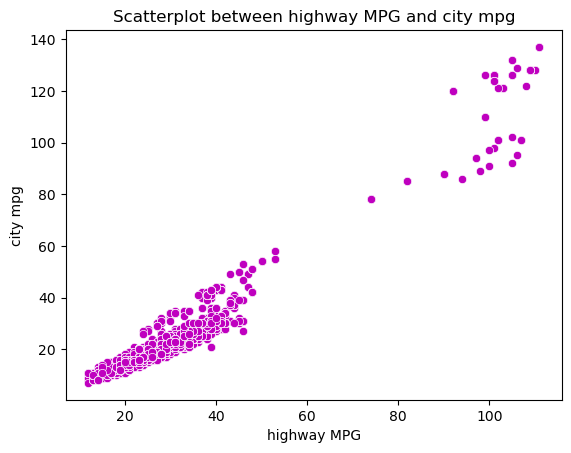

In [954]:
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = df, color = 'm')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

### Checking correlation using heatmap

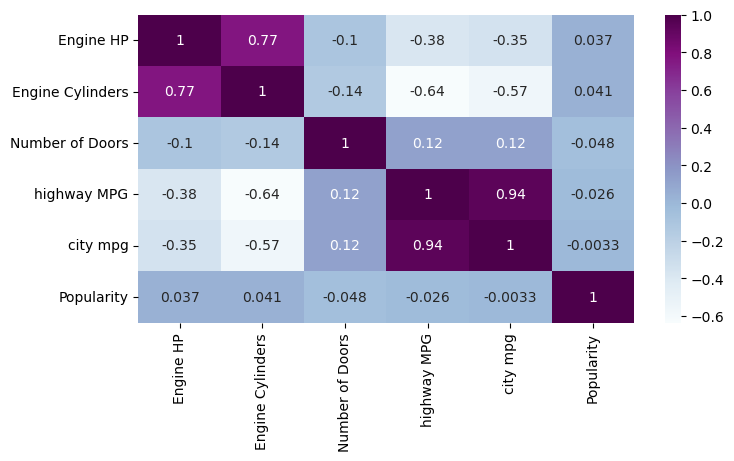

In [955]:
plt.figure(figsize = (8, 4))
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = df[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)
plt.show()

### Average highway mpg for different years

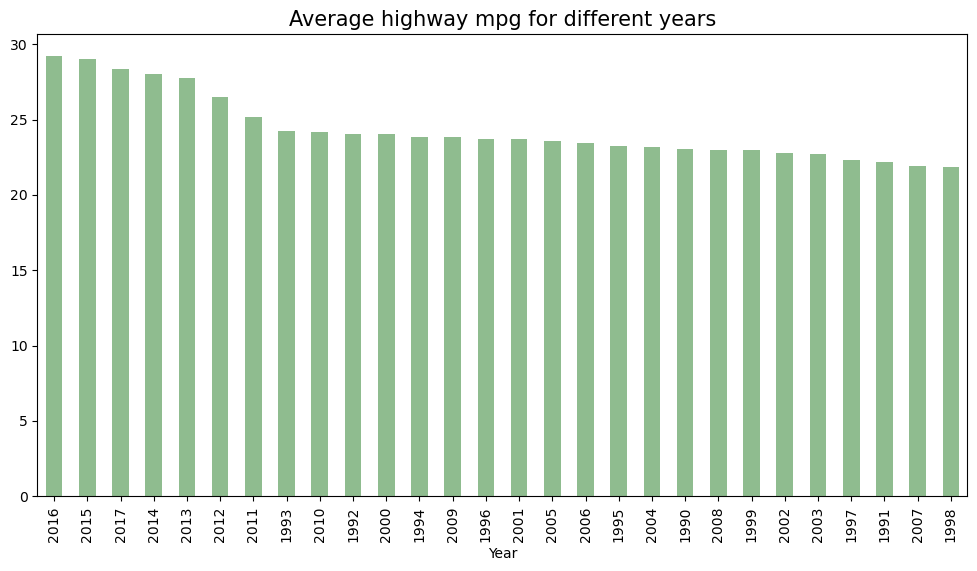

In [956]:
plt.figure(figsize = (12, 6))
df.groupby('Year')['highway MPG'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'darkseagreen')
plt.title("Average highway mpg for different years", fontsize = 15)
plt.show()

In [957]:
df['Present Year'] = 2025

In [958]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,2025
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,2025
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,2025
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,2025
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,2025


### Adding new column showing cars age

In [959]:
df['Years Old'] = df['Present Year'] - df['Year']

In [960]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year,Years Old
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,2025,14
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,2025,14
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,2025,14
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,2025,14
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,2025,14


### Removing Year & Present Year 

In [961]:
df.drop(['Year', 'Present Year'], inplace = True, axis = 1)

In [962]:
df.head()

,Make,Model,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Years Old
0,BMW,1 Series M,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,14
1,BMW,1 Series,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,14
2,BMW,1 Series,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,14
3,BMW,1 Series,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,14
4,BMW,1 Series,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,14


### Number of cars with their ages

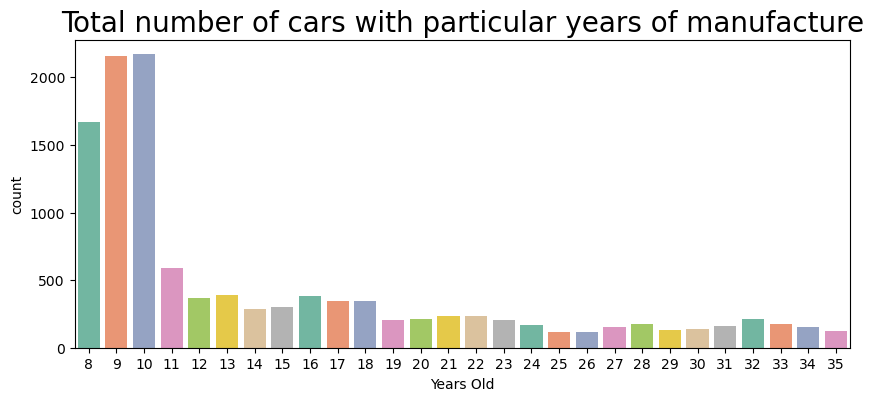

In [963]:
plt.figure(figsize = (10, 4))
sns.barplot(y = df['Years Old'].value_counts(), x = df['Years Old'].value_counts().index, palette = 'Set2')
plt.title("Total number of cars with particular years of manufacture", fontsize = 20)
plt.show()

### Using pandas to make dummies of unique variables of features

In [964]:
df = pd.get_dummies(df, dtype = 'int64', drop_first = True)
df.head()

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Years Old,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Bugatti,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,Make_Ferrari,Make_Ford,Make_GMC,Make_Genesis,Make_HUMMER,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Kia,Make_Lamborghini,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lotus,Make_Maserati,Make_Maybach,Make_Mazda,Make_McLaren,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Rolls-Royce,Make_Saab,Make_Scion,Make_Spyker,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Model_1 Series M,Model_100,Model_124 Spider,Model_190-Class,Model_2,Model_2 Series,Model_200,Model_200SX,Model_240,Model_240SX,Model_3,Model_3 Series,Model_3 Series Gran Turismo,Model_300,Model_300-Class,Model_3000GT,Model_300M,Model_300ZX,Model_323,Model_350-Class,Model_350Z,Model_360,Model_370Z,Model_4 Series,Model_4 Series Gran Coupe,Model_400-Class,Model_420-Class,Model_456M,Model_458 Italia,Model_4C,Model_4Runner,Model_5,Model_5 Series,Model_5 Series Gran Turismo,Model_500,Model_500-Class,Model_500L,Model_500X,Model_500e,Model_550,Model_560-Class,Model_57,Model_570S,Model_575M,Model_599,Model_6,Model_6 Series,Model_6 Series Gran Coupe,Model_600-Class,Model_6000,Model_612 Scaglietti,Model_62,Model_626,Model_650S Coupe,Model_650S Spider,Model_7 Series,Model_718 Cayman,Model_740,Model_760,Model_780,Model_8 Series,Model_80,Model_850,Model_86,Model_9-2X,Model_9-3,Model_9-3 Griffin,Model_9-4X,Model_9-5,Model_9-7X,Model_90,Model_900,Model_9000,Model_911,Model_928,Model_929,Model_940,Model_944,Model_960,Model_968,Model_A3,Model_A4,Model_A4 allroad,Model_A5,Model_A6,Model_A7,Model_A8,Model_ALPINA B6 Gran Coupe,Model_ALPINA B7,Model_AMG GT,Model_ATS,Model_ATS Coupe,Model_ATS-V,Model_Acadia,Model_Acadia Limited,Model_Accent,Model_Acclaim,Model_Accord,Model_Accord Crosstour,Model_Accord Hybrid,Model_Accord Plug-In Hybrid,Model_Achieva,Model_ActiveHybrid 5,Model_ActiveHybrid 7,Model_ActiveHybrid X6,Model_Aerio,Model_Aerostar,Model_Alero,Model_Allante,Model_Alpina,Model_Altima,Model_Altima Hybrid,Model_Amanti,Model_Armada,Model_Arnage,Model_Aspen,Model_Aspire,Model_Astro,Model_Astro Cargo,Model_Aurora,Model_Avalanche,Model_Avalon,Model_Avalon Hybrid,Model_Avenger,Model_Aventador,Model_Aveo,Model_Aviator,Model_Axxess,Model_Azera,Model_Aztek,Model_Azure,Model_Azure T,Model_B-Class Electric Drive,Model_B-Series,Model_B-Series Pickup,Model_B-Series Truck,Model_B9 Tribeca,Model_BRZ,Model_Baja,Model_Beetle,Model_Beetle Convertible,Model_Beretta,Model_Black Diamond Avalanche,Model_Blackwood,Model_Blazer,Model_Bolt EV,Model_Bonneville,Model_Borrego,Model_Boxster,Model_Bravada,Model_Breeze,Model_Bronco,Model_Bronco II,Model_Brooklands,Model_Brougham,Model_C-Class,Model_C-Max Hybrid,Model_C/K 1500 Series,Model_C/K 2500 Series,Model_C30,Model_C36 AMG,Model_C43 AMG,Model_C70,Model_C8,Model_CC,Model_CL,Model_CL-Class,Model_CLA-Class,Model_CLK-Class,Model_CLS-Class,Model_CR-V,Model_CR-Z,Model_CT 200h,Model_CT6,Model_CTS,Model_CTS Coupe,Model_CTS Wagon,Model_CTS-V,Model_CTS-V Coupe,Model_CTS-V Wagon,Model_CX-3,Model_CX-5,Model_CX-7,Model_CX-9,Model_Cabrio,Model_Cabriolet,Model_Cadenza,Model_Caliber,Model_California,Model_California T,Model_Camaro,Model_Camry,Model_Camry Hybrid,Model_Camry Solara,Model_Canyon,Model_Caprice,Model_Captiva Sport,Model_Caravan,Model_Carrera GT,Model_Cascada,Model_Catera,Model_Cavalier,Model_Cayenne,Model_Cayman,Model_Cayman S,Model_Celebrity,Model_Celica,Model_Century,Model_Challenger,Model_Charger,Model_Chevy Van,Model_Ciera,Model_Cirrus,Model_City Express,Model_Civic,Model_Civic CRX,Model_Civic del Sol,Model_Classic,Model_Cobalt,Model_Colorado,Model_Colt,Model_Concorde,Model_Continental,Model_Continental Flying Spur,Model_Continental Flying Spur Speed,Model_Continental GT,Model_Continental GT Speed,Model_Continental GT Speed Convertible,M

### Checking the shape of the dummy dataframe

In [965]:
df.shape

(11913, 1002)

### Separating depedent & independent variable

In [966]:
x = df.drop(['MSRP'], axis = 1)
y = df['MSRP']

In [967]:
x.shape

(11913, 1001)

In [968]:
y.shape

(11913,)

### Checking for important features, using ExtraTreesRegressor

[1.82160540e-01 2.47230702e-01 3.63678283e-03 ... 3.30495195e-05
 2.73235819e-04 3.97783022e-05]


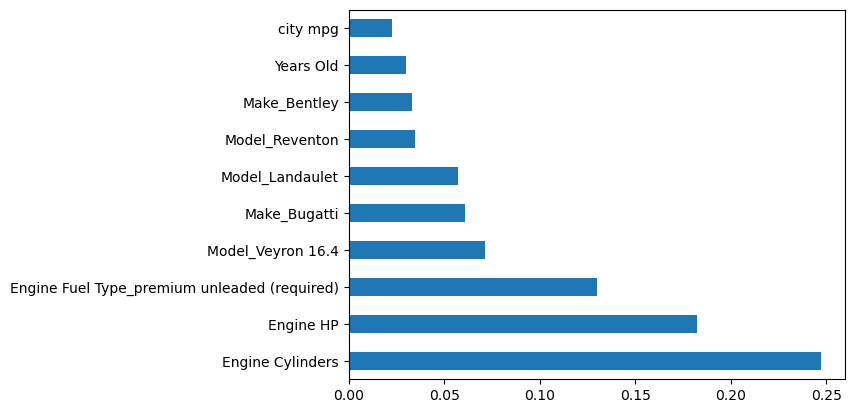

In [1110]:
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = x.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

### Distributing train & test samples for ML Algorithms

In [971]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

### Decision Tree Regressor Model

In [977]:
dt_reg_model = DecisionTreeRegressor(random_state = 0)
dt_reg_model.fit(x_train, y_train)
y_dt_reg_pred = dt_reg_model.predict(x_test)

In [1061]:
accuracy_dt = r2_score(y_test, y_dt_reg_pred)
accuracy_dt

0.9749398513579041

### Random Forest Regressor Model

In [1044]:
rf_model = RandomForestRegressor(n_estimators = 400,
                                 min_samples_split = 15,
                                 min_samples_leaf = 2,
                                 max_depth = 30)
rf_model.fit(x_train, y_train)
y_rf_pred = rf_model.predict(x_test)

In [1063]:
accuracy_rf = r2_score(y_test, y_rf_pred)
accuracy_rf

0.7878644625114823

### Ridge Model

In [1053]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
y_ridge_pred = ridge_model.predict(x_test)

In [1065]:
accuracy_ridge = r2_score(y_test, y_ridge_pred)
accuracy_ridge

0.90720441318926

### Lasso Model

In [1057]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
y_lasso_pred = lasso_model.predict(x_test)

In [1067]:
accuracy_lasso = r2_score(y_test, y_lasso_pred)
accuracy_lasso

0.9631519725771652

### Creating a new DataFrame to visualize best ML Algorithm

In [1117]:
models_df = pd.DataFrame({"Models": [ 'Decision Tree Regressor', 'Random Forest Regressor', 'Ridge', 'Lasso'],
                           "R-Square Score / Accuracy": [accuracy_dt, accuracy_rf, accuracy_ridge, accuracy_lasso]})

models_df.set_index('Models', inplace=True)
models_df.head()

,R-Square Score / Accuracy
Models,
Decision Tree Regressor,0.974940
Random Forest Regressor,0.787864
Ridge,0.907204
Lasso,0.963152


## Observations:

### 1: As per the ML models, Decision Tree Regressor or Lasso Model can give accurate & best results.